In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df=pd.read_csv('log.csv')

print(df)

     feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0     0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137   
1    -0.463418  -0.465730   0.241962  -1.913280  -1.724918  -0.562288   
2     1.465649  -0.225776   0.067528  -1.424748  -0.544383   0.110923   
3    -0.601707   1.852278  -0.013497  -1.057711   0.822545  -1.220844   
4     0.738467   0.171368  -0.115648  -0.301104  -1.478522  -0.719844   
..         ...        ...        ...        ...        ...        ...   
995   0.867805   0.227405  -0.889845  -0.960780   0.254128   0.697051   
996  -1.070666  -0.784321   0.688496  -0.234508   1.589147   0.501129   
997  -0.912588   0.701390   0.845273   0.603781   1.515318  -0.541773   
998  -0.445795  -0.503722   0.525937   0.243891  -1.192973  -0.392726   
999   1.433625   0.191451   0.662169  -1.498635   1.194214   1.301102   

     feature_6  feature_7  feature_8  feature_9  target  
0     1.579213   0.767435  -0.469474   0.542560       1  
1    -1

In [4]:
x=df.iloc[:, :-1]
y=df.iloc[:, -1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

model=DecisionTreeClassifier()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)

print(f'Accuracy :{accuracy:.4f}')
print('Confusion matrix :')
print(conf_matrix)
print('Classitioncation Report :')
print(report)

Accuracy :0.4500
Confusion matrix :
[[41 55]
 [55 49]]
Classitioncation Report :
              precision    recall  f1-score   support

           0       0.43      0.43      0.43        96
           1       0.47      0.47      0.47       104

    accuracy                           0.45       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.45      0.45      0.45       200



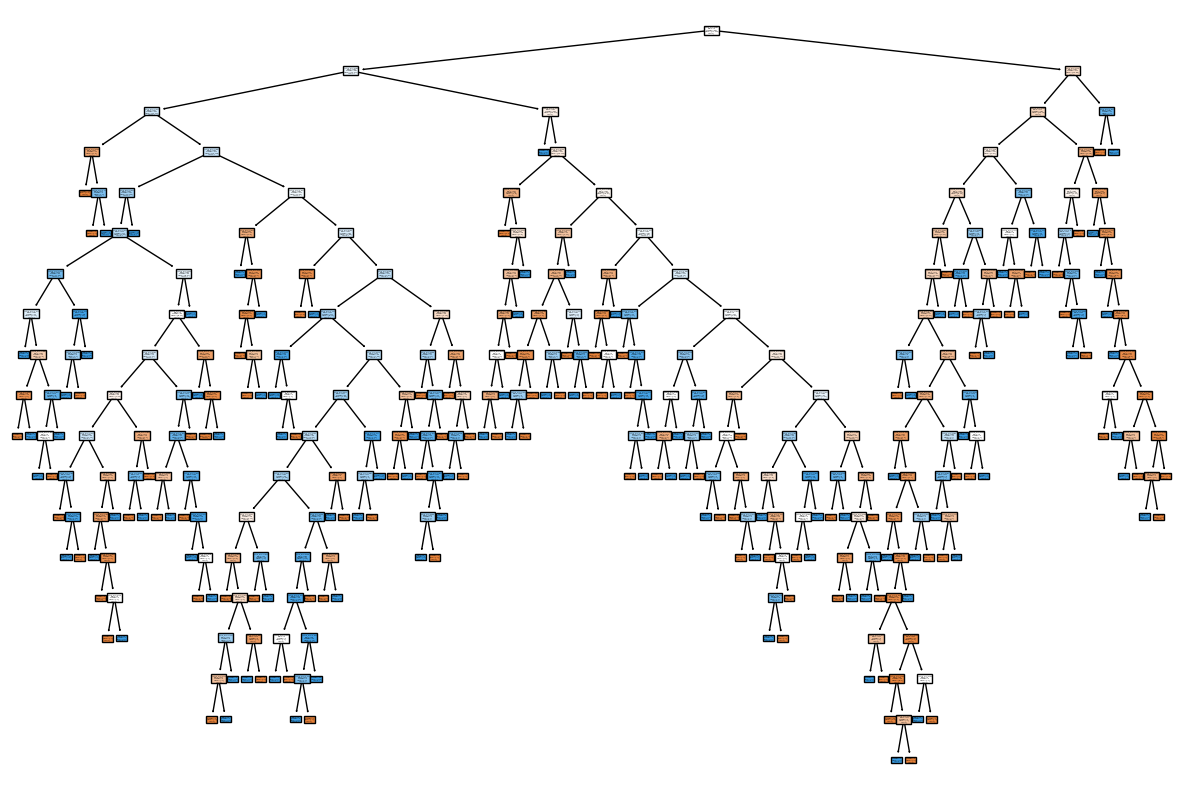

In [8]:
plt.figure(figsize=(15,10))
plot_tree(model,filled=True,feature_names=df.columns[:-1],class_names=str(np.unique(y)))
plt.show()